In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress

# Set up figure style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Physical constants
g = 9.81  # m/s^2
chi_mohrs = 3.2e-5  # m^3/kg susceptibility of Mohr's salt at 20°C

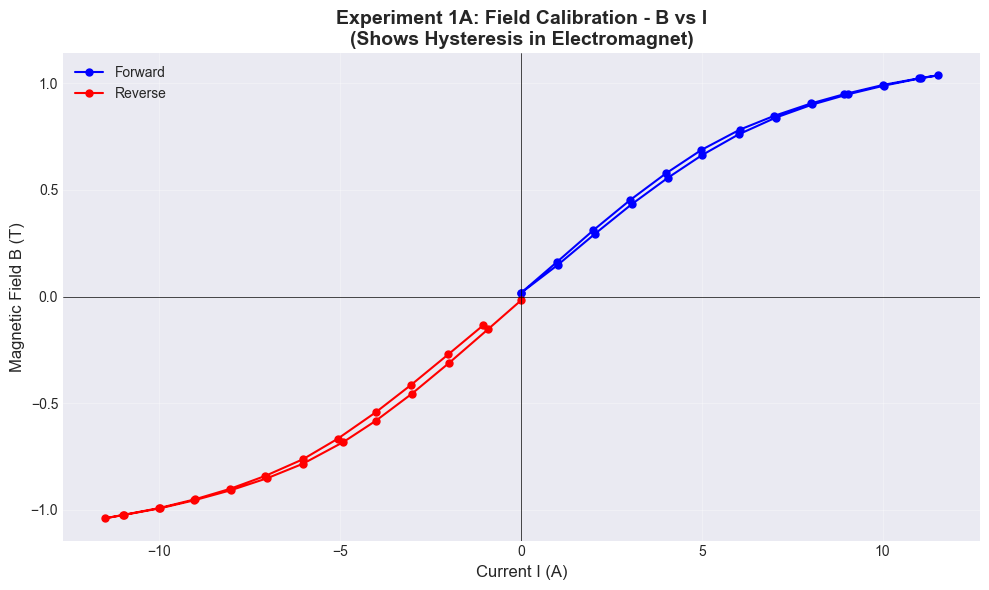

In [37]:
# Experiment 1:A - Coil current to field calibration (B vs I)
# This establishes the relationship between coil current and magnetic field

exp1a_for_current = np.array([0, 1.02, 2.05, 3.06, 4.06, 5.01, 6.02, 7.04, 8.06, 9.05, 10.05, 11.05, 11.54, 11.01, 10.02, 8.93, 8.02, 6.99, 6.05, 4.99, 4.01, 3.02, 2, 1, 0])
exp1a_for_field = np.array([0.017, 0.149, 0.295, 0.433, 0.557, 0.664, 0.761, 0.839, 0.901, 0.949, 0.99, 1.024, 1.038, 1.024, 0.993, 0.949, 0.906, 0.847, 0.783, 0.688, 0.578, 0.453, 0.311, 0.163, 0.017])

exp1a_rev_current = np.array([1.04, 2.01, 3.03, 4.01, 5.07, 6.03, 7.07, 8.05, 9.02, 10.01, 11, 11.51, 10.98, 9.98, 9.05, 8.02, 7.02, 6.03, 4.91, 4.01, 3.02, 1.98, 0.91, 0])
exp1a_rev_field = np.array([-0.134, -0.271, -0.413, -0.542, -0.667, -0.763, -0.841, -0.902, -0.951, -0.992, -1.024, -1.04, -1.024, -0.993, -0.956, -0.908, -0.852, -0.784, -0.682, -0.582, -0.456, -0.31, -0.153, -0.018])

# Create interpolation function for I -> B conversion (using forward data for positive currents)
# Combine forward and reverse for full range
all_current = np.concatenate([-exp1a_rev_current[::-1], exp1a_for_current])
all_field = np.concatenate([exp1a_rev_field[::-1], exp1a_for_field])
# Remove duplicates by averaging
current_to_field = interp1d(all_current, all_field, kind='linear', fill_value='extrapolate')

# Plot Experiment 1:A - B vs I (Field Calibration with Hysteresis)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(exp1a_for_current, exp1a_for_field, 'bo-', label='Forward', markersize=5)
ax1.plot(-exp1a_rev_current, exp1a_rev_field, 'ro-', label='Reverse', markersize=5)
ax1.set_xlabel('Current I (A)', fontsize=12)
ax1.set_ylabel('Magnetic Field B (T)', fontsize=12)
ax1.set_title('Experiment 1A: Field Calibration - B vs I\n(Shows Hysteresis in Electromagnet)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Calibration constant α = 55819.00 T/m
Linear fit: R² = 0.8576


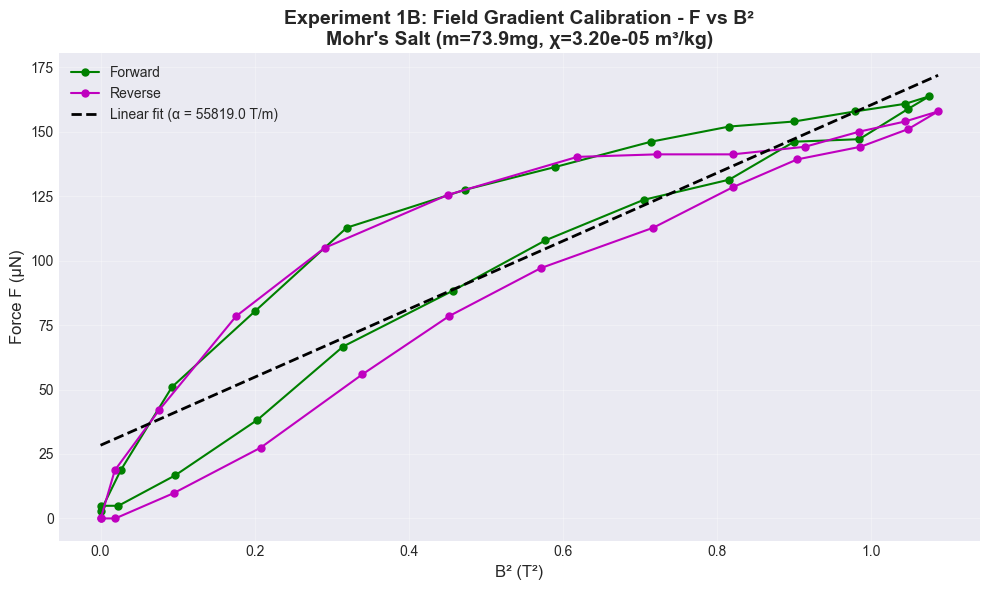

In [38]:
# Experiment 1B - Field Gradient Calibration using Mohr's Salt (73.9mg)
# According to Eq. 2.6: F = m·χ·α·B², so plot F vs B² to find α
# χ for Mohr's salt = 3.2×10⁻⁵ m³/kg at 20°C

mohrs_mass = 73.9e-6  # kg (73.9 mg)
mohrs_for_current = np.array([0, 1.04, 2, 3.01, 4.05, 5, 6.01, 7.05, 8.04, 9.03, 10.01, 11.03, 11.52, 10.96, 10.05, 9.03, 8.04, 7, 6.03, 4.99, 4.04, 3.03, 2.02, 0.99, 0])
mohrs_for_weight = np.array([0.5, 0.5, 1.7, 3.9, 6.8, 9, 11, 12.6, 13.4, 14.9, 15, 16.2, 16.7, 16.4, 16.1, 15.7, 15.5, 14.9, 13.9, 13, 11.5, 8.2, 5.2, 1.9, 0.3])

mohrs_rev_current = np.array([0, 1.01, 1.97, 3.02, 4.02, 5.01, 5.96, 6.95, 8.03, 9.02, 10.05, 10.99, 11.6, 10.92, 10.03, 9.06, 7.99, 7.03, 6.07, 5.02, 3.99, 3.08, 2.04, 1.05, 0])
mohrs_rev_weight = np.array([0, 0, 1, 2.8, 5.7, 8, 9.9, 11.5, 13.1, 14.2, 14.7, 15.4, 16.1, 15.7, 15.3, 14.7, 14.4, 14.4, 14.3, 12.8, 10.7, 8, 4.3, 1.9, 0])

# Convert current to B field using calibration (use absolute value since B² is symmetric)
mohrs_for_B = np.abs(current_to_field(mohrs_for_current))
mohrs_rev_B = np.abs(current_to_field(-mohrs_rev_current))

# Convert weight (mg) to force (N): F = Δm × g
mohrs_for_F = mohrs_for_weight * 1e-6 * g  # Convert mg to kg, then to force
mohrs_rev_F = mohrs_rev_weight * 1e-6 * g

# Calculate B²
mohrs_for_B2 = mohrs_for_B**2
mohrs_rev_B2 = mohrs_rev_B**2

# Plot F vs B² (Eq. 2.6: F = m·χ·α·B²)
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(mohrs_for_B2, mohrs_for_F * 1e6, 'go-', label='Forward', markersize=5)
ax2.plot(mohrs_rev_B2, mohrs_rev_F * 1e6, 'mo-', label='Reverse', markersize=5)

# Linear fit to determine α (slope = m·χ·α)
# Combine data for fit (excluding near-zero values)
mask_for = mohrs_for_B2 > 0.01
mask_rev = mohrs_rev_B2 > 0.01
B2_fit = np.concatenate([mohrs_for_B2[mask_for], mohrs_rev_B2[mask_rev]])
F_fit = np.concatenate([mohrs_for_F[mask_for], mohrs_rev_F[mask_rev]])
slope, intercept, r_value, p_value, std_err = linregress(B2_fit, F_fit)

# α = slope / (m·χ)
alpha = slope / (mohrs_mass * chi_mohrs)
print(f"Calibration constant α = {alpha:.2f} T/m")
print(f"Linear fit: R² = {r_value**2:.4f}")

# Plot fit line
B2_line = np.linspace(0, max(mohrs_for_B2.max(), mohrs_rev_B2.max()), 100)
F_line = slope * B2_line + intercept
ax2.plot(B2_line, F_line * 1e6, 'k--', label=f'Linear fit (α = {alpha:.1f} T/m)', linewidth=2)

ax2.set_xlabel('B² (T²)', fontsize=12)
ax2.set_ylabel('Force F (μN)', fontsize=12)
ax2.set_title(f'Experiment 1B: Field Gradient Calibration - F vs B²\nMohr\'s Salt (m={mohrs_mass*1e6:.1f}mg, χ={chi_mohrs:.2e} m³/kg)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Measured susceptibility χ (GGG) = 9.95e-05 m³/kg
Linear fit R² = 0.6781


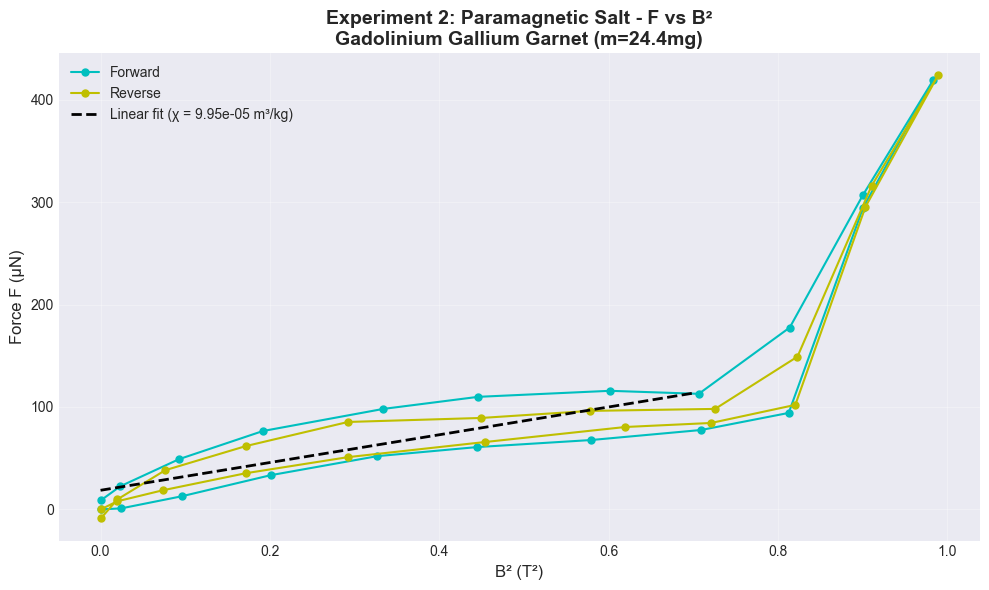

In [39]:
# Experiment 2 - Paramagnetic Salt: Gadolinium Gallium Garnet (24.4mg)
# Measure susceptibility χ by plotting F vs B² (Eq. 2.4: F = m·χ·α·B²)
# Then compare with Curie law (Eq. 2.7)

ggg_mass = 24.4e-6  # kg (24.4 mg)
exp2_for_current = np.array([0, 1.01, 1.99, 2.99, 3.97, 5.04, 6.02, 7.02, 8.07, 9.05, 9.99, 9.03, 8.05, 7.03, 6.04, 5.05, 4.01, 3.05, 2.02, 0.93, 0])
exp2_for_weight = np.array([0, 0.1, 1.3, 3.4, 5.3, 6.2, 6.9, 7.9, 9.6, 30, 42.7, 31.3, 18.1, 11.5, 11.8, 11.2, 10, 7.8, 5, 2.3, 0.9])

exp2_rev_current = np.array([0, 1, 2.01, 3.04, 4, 5, 6.08, 6.98, 7.99, 9.01, 10.09, 9.04, 8.01, 7.02, 6, 5.03, 4, 3.04, 2.04, 0.99, 0])
exp2_rev_weight = np.array([0, 0.8, 1.9, 3.6, 5.2, 6.7, 8.2, 8.6, 10.4, 30.1, 43.2, 32.2, 15.2, 10, 9.8, 9.1, 8.7, 6.3, 3.9, 1, -0.9])

# Convert current to B field
exp2_for_B = np.abs(current_to_field(exp2_for_current))
exp2_rev_B = np.abs(current_to_field(-exp2_rev_current))

# Convert weight to force
exp2_for_F = exp2_for_weight * 1e-6 * g
exp2_rev_F = exp2_rev_weight * 1e-6 * g

# Calculate B²
exp2_for_B2 = exp2_for_B**2
exp2_rev_B2 = exp2_rev_B**2

# Plot F vs B²
fig3, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(exp2_for_B2, exp2_for_F * 1e6, 'co-', label='Forward', markersize=5)
ax3.plot(exp2_rev_B2, exp2_rev_F * 1e6, 'yo-', label='Reverse', markersize=5)

# Linear fit to determine χ (slope = m·χ·α, so χ = slope/(m·α))
# Use only low-field data (exclude anomalous high-field points)
mask_for = (exp2_for_B2 > 0.01) & (exp2_for_B2 < 0.7)
mask_rev = (exp2_rev_B2 > 0.01) & (exp2_rev_B2 < 0.7)
B2_fit = np.concatenate([exp2_for_B2[mask_for], exp2_rev_B2[mask_rev]])
F_fit = np.concatenate([exp2_for_F[mask_for], exp2_rev_F[mask_rev]])

if len(B2_fit) > 2:
    slope_ggg, intercept_ggg, r_value_ggg, _, _ = linregress(B2_fit, F_fit)
    chi_ggg = slope_ggg / (ggg_mass * alpha)
    print(f"Measured susceptibility χ (GGG) = {chi_ggg:.2e} m³/kg")
    print(f"Linear fit R² = {r_value_ggg**2:.4f}")
    
    # Plot fit line
    B2_line = np.linspace(0, 0.7, 100)
    F_line = slope_ggg * B2_line + intercept_ggg
    ax3.plot(B2_line, F_line * 1e6, 'k--', label=f'Linear fit (χ = {chi_ggg:.2e} m³/kg)', linewidth=2)

ax3.set_xlabel('B² (T²)', fontsize=12)
ax3.set_ylabel('Force F (μN)', fontsize=12)
ax3.set_title(f'Experiment 2: Paramagnetic Salt - F vs B²\nGadolinium Gallium Garnet (m={ggg_mass*1e6:.1f}mg)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Saturation magnetization σ_s ≈ 0.00 A·m²/kg


/var/folders/95/2f_bf5m90n35mkzdq50c2zcr0000gn/T/ipykernel_31601/3471830290.py:53: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/95/2f_bf5m90n35mkzdq50c2zcr0000gn/T/ipykernel_31601/3471830290.py:53: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/matthewconway/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matthewconway/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


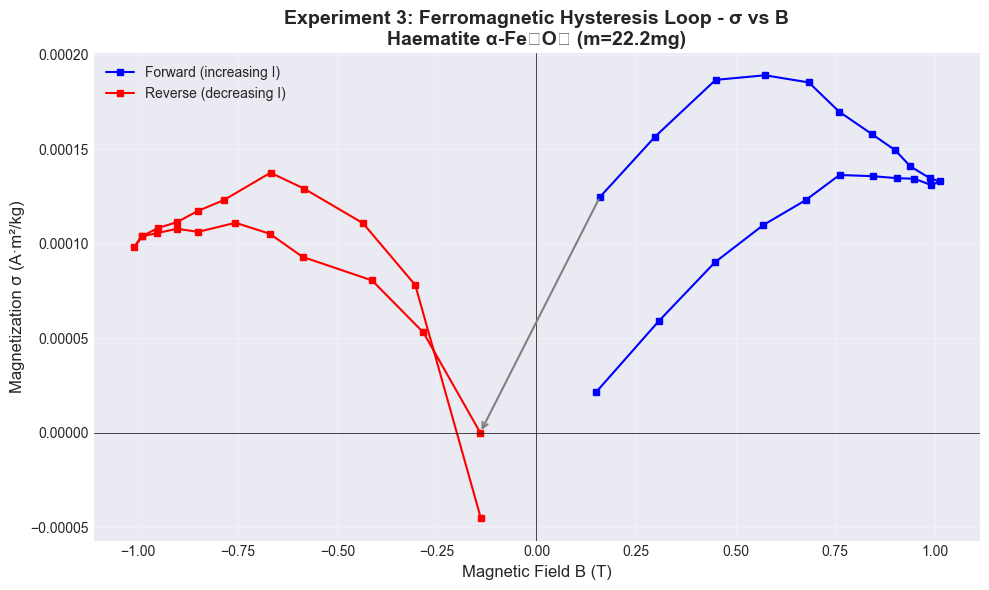

In [40]:
# Experiment 3 - Ferromagnetic Material: Haematite α-Fe₂O₃ (22.2mg)
# Plot σ (magnetization per unit mass) vs B to see hysteresis loop
# From Eq. 2.5: F = m·σ·α·B, so σ = F/(m·α·B)

hematite_mass = 22.2e-6  # kg (22.2 mg)
exp3_for_current = np.array([0, 1.02, 2.01, 2.99, 4.03, 5, 6.02, 6.98, 8.02, 9.02, 9.99, 10.69, 9.94, 8.75, 7.95, 7.02, 6.01, 4.96, 4.02, 3, 2.04, 1.08, 0])
exp3_for_weight = np.array([0.6, 0.4, 2.3, 5.1, 7.9, 10.5, 13.1, 14.5, 15.4, 16.1, 16.4, 17, 16.8, 16.7, 17, 16.8, 16.3, 16, 13.7, 10.6, 5.9, 2.5, -0.6])

exp3_rev_current = np.array([0.99, 2, 3.03, 4.06, 5.04, 5.96, 6.99, 7.95, 9.03, 10.01, 10.57, 9.93, 9.02, 8.08, 7.01, 6.05, 5.06, 4.02, 2.91, 1.95, 0.82, 0])
exp3_rev_weight = np.array([0, 1.9, 4.2, 6.9, 8.9, 10.6, 11.4, 12.3, 12.7, 13, 12.5, 13, 13, 12.7, 12.6, 12.2, 11.6, 9.5, 6.1, 3, -0.8, -3.1])

# Convert current to B field (positive for forward, negative for reverse)
exp3_for_B = current_to_field(exp3_for_current)
exp3_rev_B = current_to_field(-exp3_rev_current)

# Convert weight to force
exp3_for_F = exp3_for_weight * 1e-6 * g
exp3_rev_F = exp3_rev_weight * 1e-6 * g

# Calculate magnetization σ = F/(m·α·B)
# Avoid division by zero
exp3_for_sigma = np.zeros_like(exp3_for_F)
exp3_rev_sigma = np.zeros_like(exp3_rev_F)

mask_for = np.abs(exp3_for_B) > 0.05
mask_rev = np.abs(exp3_rev_B) > 0.05

exp3_for_sigma[mask_for] = exp3_for_F[mask_for] / (hematite_mass * alpha * np.abs(exp3_for_B[mask_for]))
exp3_rev_sigma[mask_rev] = exp3_rev_F[mask_rev] / (hematite_mass * alpha * np.abs(exp3_rev_B[mask_rev]))

# Plot σ vs B (Hysteresis Loop)
fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.plot(exp3_for_B[mask_for], exp3_for_sigma[mask_for], 'bs-', label='Forward (increasing I)', markersize=5)
ax4.plot(exp3_rev_B[mask_rev], exp3_rev_sigma[mask_rev], 'rs-', label='Reverse (decreasing I)', markersize=5)

# Connect the loop
ax4.annotate('', xy=(exp3_rev_B[mask_rev][0], exp3_rev_sigma[mask_rev][0]), 
             xytext=(exp3_for_B[mask_for][-1], exp3_for_sigma[mask_for][-1]),
             arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax4.set_xlabel('Magnetic Field B (T)', fontsize=12)
ax4.set_ylabel('Magnetization σ (A·m²/kg)', fontsize=12)
ax4.set_title(f'Experiment 3: Ferromagnetic Hysteresis Loop - σ vs B\nHaematite α-Fe₂O₃ (m={hematite_mass*1e6:.1f}mg)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax4.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax4.grid(True, alpha=0.3)

# Print saturation magnetization
sigma_sat = np.max(exp3_for_sigma)
print(f"Saturation magnetization σ_s ≈ {sigma_sat:.2f} A·m²/kg")

plt.tight_layout()
plt.show()